1. Dados los datos:

    |ejes  | datos                                                                 |
    |---   |-----------------------------------------------------------------------|
    |xi    | 4.0 4.2 4.5 4.7 5.1 5.5 5.9 6.3 6.8 7.1                               |
    |yi    | 102.56 130.11 113.18 142.05 167.53 195.14 224.87 256.73 299.50 326.72 |

    a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.

    b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.

    c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.

    d. Construya el polinomio por mínimos cuadrados de la forma 𝑏𝑒^ax y calcule el error.

    e. Construya el polinomio por mínimos cuadrados de la forma 𝑏𝑥^a y calcule el error.


2. Repita el ejercicio 5 para los siguientes datos.

    |eje|datos|
    |---|---  |
    |xi |0.2 0.3 0.6 0.9 1.1 1.3 1.4 1.6|
    |yi |0.050446 0.098426 0.33277 0.72660 1.0972 1.5697 1.8487 2.5015|

Ejercicio 1:
Resultados:
Polinomio de grado 1:  
71.61 x - 191.6
Error (grado 1): 105.88388862638904
Polinomio de grado 2:        2
8.217 x - 19.31 x + 51
Error (grado 2): 55.16562001170232
Polinomio de grado 3:         3         2
-2.607 x + 51.56 x - 254.9 x + 469.2
Error (grado 3): 51.83830647403006
Modelo exponencial (b*e^(a*x)): a=0.35492705587107687, b=26.84077917104301
Error (exponencial): 74.36215913503456
Modelo potencia (b*x^a): a=2.015190342585292, b=6.283966084740469
Error (potencia): 57.25817542056742


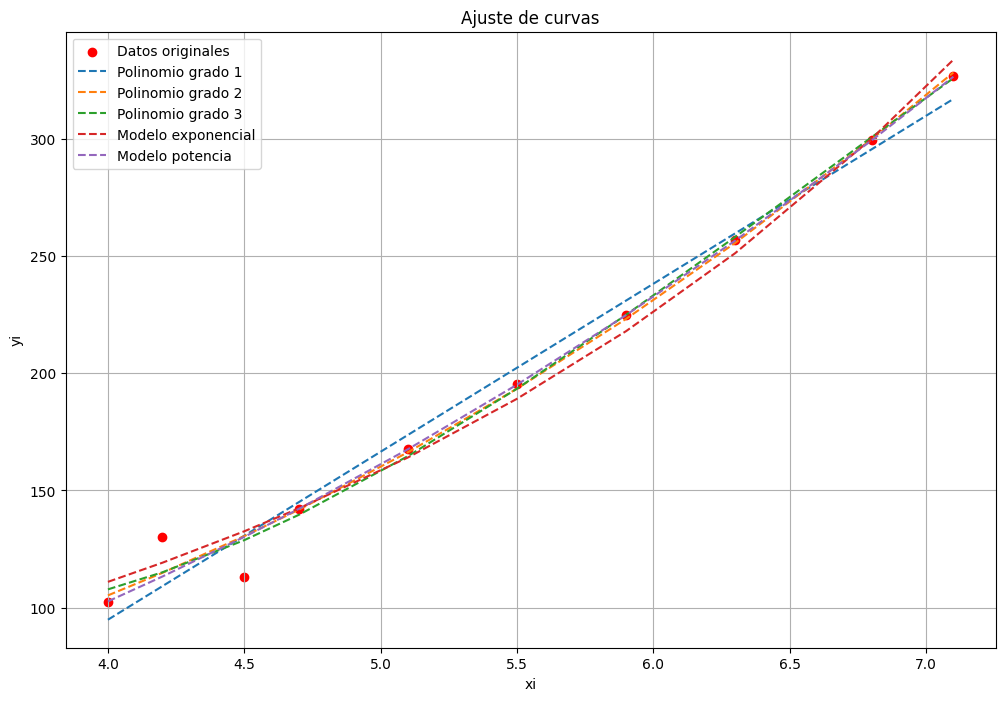

Ejercicio 2:
Resultados:
Polinomio de grado 1:  
1.666 x - 0.5125
Error (grado 1): 0.041948731969935996
Polinomio de grado 2:        2
1.129 x - 0.3114 x + 0.08514
Error (grado 2): 0.0003024893661783383
Polinomio de grado 3:         3          2
0.2662 x + 0.4029 x + 0.2484 x - 0.0184
Error (grado 3): 6.343339444533196e-07
Modelo exponencial (b*e^(a*x)): a=1.8583097836630265, b=0.13258726876453153
Error (exponencial): 0.008498467250039738
Modelo potencia (b*x^a): a=2.1427728837706423, b=0.9055224503277092
Error (potencia): 0.00043594151427458333


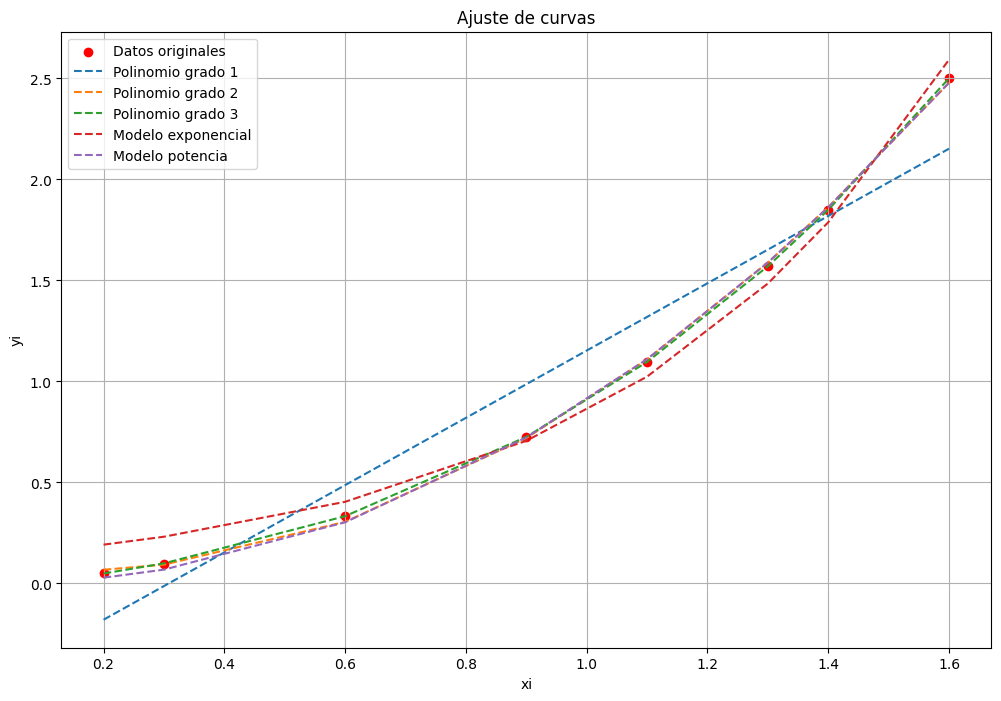

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos proporcionados para el primer ejercicio
xi1 = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
yi1 = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Datos proporcionados para el segundo ejercicio
xi2 = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yi2 = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])

# Función para calcular el error cuadrático medio (MSE)
def calcular_error(y_real, y_ajustada):
    return np.mean((y_real - y_ajustada) ** 2)

# Función para realizar los ajustes y cálculos
def realizar_ajustes(xi, yi):
    # a. Polinomio de grado 1
    coef_1 = np.polyfit(xi, yi, 1)
    poli_1 = np.poly1d(coef_1)
    y_ajustada_1 = poli_1(xi)
    error_1 = calcular_error(yi, y_ajustada_1)

    # b. Polinomio de grado 2
    coef_2 = np.polyfit(xi, yi, 2)
    poli_2 = np.poly1d(coef_2)
    y_ajustada_2 = poli_2(xi)
    error_2 = calcular_error(yi, y_ajustada_2)

    # c. Polinomio de grado 3
    coef_3 = np.polyfit(xi, yi, 3)
    poli_3 = np.poly1d(coef_3)
    y_ajustada_3 = poli_3(xi)
    error_3 = calcular_error(yi, y_ajustada_3)

    # d. Ajuste de la forma b*e^(a*x)
    def modelo_exponencial(x, a, b):
        return b * np.exp(a * x)

    param_exponencial, _ = curve_fit(modelo_exponencial, xi, yi, p0=(0.1, 1))
    y_ajustada_exp = modelo_exponencial(xi, *param_exponencial)
    error_exp = calcular_error(yi, y_ajustada_exp)

    # e. Ajuste de la forma b*x^a
    def modelo_potencia(x, a, b):
        return b * x**a

    param_potencia, _ = curve_fit(modelo_potencia, xi, yi, p0=(1, 1))
    y_ajustada_pot = modelo_potencia(xi, *param_potencia)
    error_pot = calcular_error(yi, y_ajustada_pot)

    # Resultados
    print("Resultados:")
    print(f"Polinomio de grado 1: {poli_1}")
    print(f"Error (grado 1): {error_1}")
    print(f"Polinomio de grado 2: {poli_2}")
    print(f"Error (grado 2): {error_2}")
    print(f"Polinomio de grado 3: {poli_3}")
    print(f"Error (grado 3): {error_3}")
    print(f"Modelo exponencial (b*e^(a*x)): a={param_exponencial[0]}, b={param_exponencial[1]}")
    print(f"Error (exponencial): {error_exp}")
    print(f"Modelo potencia (b*x^a): a={param_potencia[0]}, b={param_potencia[1]}")
    print(f"Error (potencia): {error_pot}")

    # Gráficas
    plt.figure(figsize=(12, 8))
    plt.scatter(xi, yi, color='red', label='Datos originales')
    plt.plot(xi, y_ajustada_1, label='Polinomio grado 1', linestyle='--')
    plt.plot(xi, y_ajustada_2, label='Polinomio grado 2', linestyle='--')
    plt.plot(xi, y_ajustada_3, label='Polinomio grado 3', linestyle='--')
    plt.plot(xi, y_ajustada_exp, label='Modelo exponencial', linestyle='--')
    plt.plot(xi, y_ajustada_pot, label='Modelo potencia', linestyle='--')

    plt.xlabel('xi')
    plt.ylabel('yi')
    plt.title('Ajuste de curvas')
    plt.legend()
    plt.grid()
    plt.show()

# Realizar ajustes para ambos conjuntos de datos
print("Ejercicio 1:")
realizar_ajustes(xi1, yi1)

print("Ejercicio 2:")
realizar_ajustes(xi2, yi2)


3. La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias
computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de
la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique
estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.
    |Puntuación ACT | Promedio de puntos | Puntuación ACT | Promedio de puntos |
    |---            |---                 |---             |---                 |
    |28 |3.84 |29 |3.75|
    |25 |3.21 |28 |3.65|
    |28 |3.23 |27 |3.87|
    |27 |3.63 |29 |3.75|
    |28 |3.75 |21 |1.66|
    |33 |3.20 |28 |3.12|
    |28 |3.41 |28 |2.96|
    |29 |3.38 |26 |2.92|
    |23 |3.53 |30 |3.10|
    |27 |2.03 |24 |2.81|

Ecuación de la recta por mínimos cuadrados:
y = 0.1009x + 0.4866
Error cuadrático medio: 0.2524


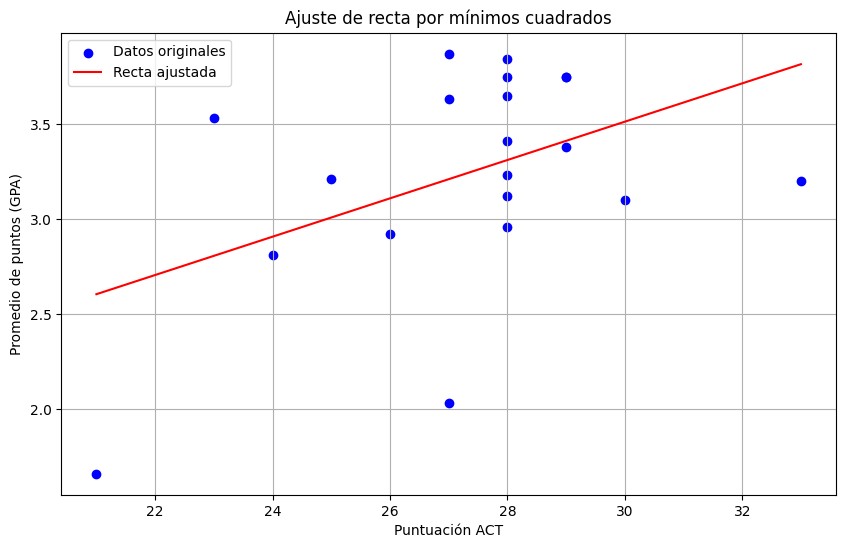

In [4]:
act_scores = np.array([28, 29, 25, 28, 28, 27, 27, 29, 28, 21, 33, 28, 28, 28, 29, 26, 23, 30, 27, 24])
gpa_scores = np.array([3.84, 3.75, 3.21, 3.65, 3.23, 3.63, 3.87, 3.75, 3.75, 1.66, 3.20, 3.12, 3.41, 2.96, 3.38, 2.92, 3.53, 3.10, 2.03, 2.81])

# Ajuste por mínimos cuadrados (recta)
coef = np.polyfit(act_scores, gpa_scores, 1)
recta = np.poly1d(coef)

# Calcular valores ajustados y error
ajustados = recta(act_scores)
error = np.mean((gpa_scores - ajustados)**2)

# Mostrar resultados
print("Ecuación de la recta por mínimos cuadrados:")
print(f"y = {coef[0]:.4f}x + {coef[1]:.4f}")
print(f"Error cuadrático medio: {error:.4f}")

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(act_scores, gpa_scores, color='blue', label='Datos originales')
plt.plot(np.sort(act_scores), recta(np.sort(act_scores)), color='red', label='Recta ajustada')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos (GPA)')
plt.title('Ajuste de recta por mínimos cuadrados')
plt.legend()
plt.grid()
plt.show()


4. El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las
características comparativas de supervivencia durante un choque de automóviles de diferentes clases.
Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de
vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).
|Tipo| Peso promedio| Porcentaje de presentación|
|--- |---           |---                        |
|1. Regular lujoso doméstico| 4800 lb| 3.1|
|2. Regular intermediario doméstico| 3700 lb| 4.0|
|3. Regular económico doméstico| 3400 lb| 5.2|
|4. Compacto doméstico| 2800 lb| 6.4|
|5. Compacto extranjero| 1900 lb| 9.6|

Ecuación de la recta por mínimos cuadrados:
y = -0.0023x + 13.1465
Error cuadrático medio: 0.4118


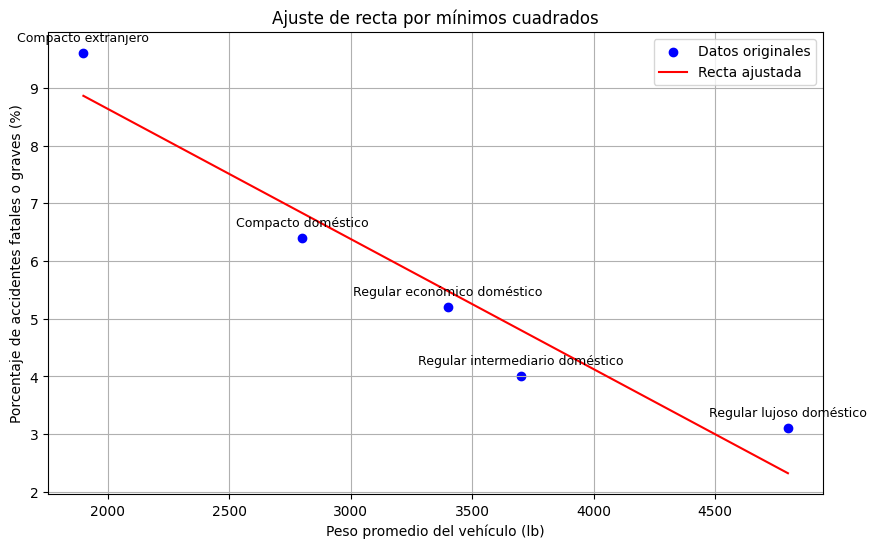

In [5]:
# Datos proporcionados para el ejercicio sobre choques de automóviles
tipos = [
    "Regular lujoso doméstico",
    "Regular intermediario doméstico",
    "Regular económico doméstico",
    "Compacto doméstico",
    "Compacto extranjero"
]
vehicle_weights = np.array([4800, 3700, 3400, 2800, 1900])
accident_percentages = np.array([3.1, 4.0, 5.2, 6.4, 9.6])

# Ajuste por mínimos cuadrados (recta) para los datos
def ajuste_minimos_cuadrados(x, y):
    coef = np.polyfit(x, y, 1)
    recta = np.poly1d(coef)
    ajustados = recta(x)
    error = np.mean((y - ajustados)**2)
    return coef, recta, error

coef, recta, error = ajuste_minimos_cuadrados(vehicle_weights, accident_percentages)

# Mostrar resultados
print("Ecuación de la recta por mínimos cuadrados:")
print(f"y = {coef[0]:.4f}x + {coef[1]:.4f}")
print(f"Error cuadrático medio: {error:.4f}")

# Gráfica
plt.figure(figsize=(10, 6))
plt.scatter(vehicle_weights, accident_percentages, color='blue', label='Datos originales')
plt.plot(np.sort(vehicle_weights), recta(np.sort(vehicle_weights)), color='red', label='Recta ajustada')
for i, tipo in enumerate(tipos):
    plt.text(vehicle_weights[i], accident_percentages[i] + 0.2, tipo, fontsize=9, ha='center')
plt.xlabel('Peso promedio del vehículo (lb)')
plt.ylabel('Porcentaje de accidentes fatales o graves (%)')
plt.title('Ajuste de recta por mínimos cuadrados')
plt.legend()
plt.grid()
plt.show()
